# multiclass-prediction 

In [2027]:

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import sklearn
import keras
from tensorflow.keras.optimizers.legacy import Adam
from scikeras.wrappers import KerasRegressor
from keras.layers import Dropout
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
import torch
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2028]:
df_syn = pd.read_csv('synthetic_data.csv')

In [2029]:
df_syn.columns

Index(['Unnamed: 0', 'Kassenr', 'Anteroposterior 1', 'Anteroposterior 2',
       'Vertical 1', 'Vertical 2', 'Transverse', 'Crowding ', 'Spacing',
       'Tooth shape/size\r\n', 'Pan 1', 'Pan 2\r\n', 'Anteroposterior 1.1',
       'Anteroposterior', 'Vertical 1.1', 'Vertical 2.1', 'Transverse.1',
       'Crowding .1', 'Spacing.1', 'Tooth shape/size\r\n.1', 'Pan 1.1',
       'Pan 2\r\n.1', 'Anteroposterior 1.2', 'Anteroposterior 2.1',
       'Vertical 1.2', 'Vertical 2.2', 'Transverse.2', 'Crowding .2',
       'Spacing.2', 'Tooth shape/size\r\n.2', 'Pan 1.2', 'Pan 2\r\n.2',
       'Total Row Score A', 'Total Row Score B', 'Total Row Score C'],
      dtype='object')

In [2030]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])


In [2031]:
def pin_update(row):
    if row["Total Row Score C"] <= 2:
        return 1
    else:
        return 0

In [2032]:
def pin_update1(row):
     if 2 < row["Total Row Score C"] <= 20:
          return 1
     else:
          return 0 

In [2033]:
def pin_update2(row):
    if row["Total Row Score C"] > 20:
        return 1
    return 0 

In [2034]:

#  # create model
# model = Sequential()
# model.add(Dense(32, input_dim=19, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(8,activation='relu'))
# model.add(Dense(3, activation='softmax'))
#  # Compile model
# model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])


In [2035]:
def total_row_score(vector):
    vector[7] = sum(vector[0:7])
    vector[15] = sum(vector[8:15])
    print(vector)

In [2036]:
def predic_func(pred):
    if pred[0] > pred[1] and pred[0] > pred[2]:
        return f"the estimate would be class 1 with a probability of {pred[0]*100}"
    elif pred[1] > pred[0] and pred[1] > pred[2]:
        return f"The estimate would be class 2 with a probability of {pred[1]*100}"
    else:
        return f"the estimate would be class 3 with a probability of {pred[2]*100}"

In [2037]:
Output = df.apply(pin_update, axis=1)
Output1 = df.apply(pin_update1, axis=1)
Output2 = df.apply(pin_update2, axis=1)
df['Output'] = Output
df['Output1'] = Output1
df['Output2']  = Output2
df

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score C,Goslon Score C,Output,Output1,Output2
Center,,,,,,,,,,,,,,,,,,,,,
H,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0,0
H,2,9.0,0.0,0.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1.0,1,0,0
H,3,9.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8,1.0,0,1,0
H,4,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9,1.0,0,1,0
H,5,9.0,0.0,1.0,0.0,6.0,4.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,9,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,80,9.0,0.0,1.0,0.0,6.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3,1.0,0,1,0
Å,81,9.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4,3.0,0,1,0
Å,82,12.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12,2.0,0,1,0


In [2038]:
Output = df_syn.apply(pin_update, axis=1)
Output1 = df_syn.apply(pin_update1, axis=1)
Output2 = df_syn.apply(pin_update2, axis=1)
df_syn['Output'] = Output
df_syn['Output1'] = Output1
df_syn['Output2']  = Output2


In [2039]:
df1 = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1',
          'Output2']]
df1.iloc[1:, :]
df1

,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Tooth shape/size\r\n,Pan 2\r\n,Total Row Score A,Anteroposterior 1.1,...,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Tooth shape/size\r\n.1,Pan 2\r\n.1,Total Row Score B,Output,Output1,Output2
Center,,,,,,,,,,,,,,,,,,,,,
H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
H,9.0,0.0,0.0,0.0,6.0,4.0,0.0,4.0,23,0.0,...,0.0,0.0,6.0,4.0,0.0,3.0,13,1,0,0
H,9.0,0.0,0.0,0.0,6.0,1.0,1.0,3.0,21,9.0,...,2.0,4.0,6.0,0.0,1.0,3.0,25,0,1,0
H,0.0,0.0,0.0,0.0,2.0,1.0,0.0,4.0,10,0.0,...,0.0,0.0,6.0,3.0,0.0,0.0,10,0,1,0
H,9.0,0.0,1.0,0.0,6.0,0.0,1.0,4.0,25,9.0,...,2.0,0.0,6.0,0.0,1.0,4.0,26,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Å,9.0,0.0,1.0,0.0,6.0,3.0,0.0,4.0,23,9.0,...,0.0,0.0,6.0,3.0,0.0,3.0,21,0,1,0
Å,9.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,21,12.0,...,3.0,4.0,6.0,0.0,0.0,3.0,32,0,1,0
Å,12.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,25,9.0,...,0.0,0.0,6.0,0.0,0.0,4.0,23,0,1,0


In [2040]:
df1_syn = df_syn[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Spacing',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1',
          'Output2']]
df1_syn.iloc[1:, :]



,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Spacing,Tooth shape/size\r\n,Pan 2\r\n,Total Row Score A,Anteroposterior 1.1,...,Vertical 1.1,Vertical 2.1,Transverse.1,Spacing.1,Tooth shape/size\r\n.1,Pan 2\r\n.1,Total Row Score B,Output,Output1,Output2
1,12.0,0.0,0.0,0.0,6.0,4.0,0.0,4.0,29.0,12.0,...,0.0,0.0,8.0,0.0,1.0,4.0,25.0,1,0,0
2,12.0,0.0,0.0,0.0,6.0,0.0,1.0,4.0,27.0,0.0,...,0.0,0.0,6.0,0.0,1.0,0.0,9.0,1,0,0
3,12.0,0.0,0.0,3.0,6.0,0.0,1.0,4.0,27.0,0.0,...,0.0,1.0,6.0,0.0,0.0,3.0,10.0,1,0,0
4,12.0,0.0,2.0,0.0,6.0,0.0,1.0,4.0,25.0,3.0,...,1.0,0.0,6.0,0.0,0.0,0.0,10.0,0,1,0
5,12.0,0.0,0.0,0.0,6.0,0.0,0.0,4.0,26.0,0.0,...,0.0,0.0,6.0,0.0,1.0,4.0,11.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17578,12.0,0.0,0.0,0.0,6.0,0.0,1.0,4.0,26.0,0.0,...,3.0,0.0,6.0,0.0,1.0,4.0,17.0,1,0,0
17579,12.0,0.0,0.0,0.0,6.0,0.0,1.0,4.0,26.0,6.0,...,0.0,0.0,6.0,0.0,1.0,3.0,19.0,0,1,0
17580,12.0,0.0,2.0,0.0,8.0,0.0,0.0,4.0,29.0,0.0,...,2.0,0.0,6.0,0.0,0.0,3.0,11.0,1,0,0
17581,12.0,0.0,2.0,0.0,6.0,0.0,1.0,4.0,29.0,12.0,...,0.0,4.0,6.0,0.0,1.0,3.0,29.0,0,1,0


In [2041]:


target_column = ["Output",'Output1','Output2']
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1)
df1 = scaler.transform(df1)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67858/2750786257.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(target_column,axis=1,inplace=True)


In [2042]:

target_column = ["Output",'Output1','Output2']
numerical_column = df1_syn.columns.drop(target_column)
output_rows_syn = df1_syn[target_column]
df1_syn.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1_syn)
df1_syn = scaler.transform(df1_syn)

/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67858/3861707241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_syn.drop(target_column,axis=1,inplace=True)


In [2043]:
X_train, X_test, y_train, y_test = train_test_split(df1, output_rows, test_size=0.25,shuffle=True)
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(df1_syn, output_rows_syn, test_size=0.25,shuffle=True)


In [2044]:
no_classes= 3
no_epochs = 10
optimizer = Adam()
verbosity = 1
num_folds = 5
batch_size = 64
acc_per_fold = []
loss_per_fold = []
fold_no = 1

In [2045]:
inputs = np.concatenate((X_train_syn, X_test_syn), axis=0)
targets = np.concatenate((y_train_syn, y_test_syn), axis=0)

kfold = KFold(n_splits=num_folds, shuffle=True)

In [2046]:
for train, test in kfold.split(inputs, targets):
    model = Sequential()
    model.add(Dense(128, input_dim=18, activation='relu'))
    #model.add(Dropout(0.3))
    #model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(16,activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(8,activation='relu'))
    #model.add(Dropout(0.4))
    model.add(Dense(3, activation='softmax'))
 # Compile model
    model.compile(loss='categorical_crossentropy' , optimizer='adam', metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

  # Fit data to model
    history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] *100)
    loss_per_fold.append(scores[0])

  # Increase fold number
    fold_no = fold_no + 1
    

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10


2024-03-12 19:41:09.899023: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 15283006241330394454


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1043, in launch_instance

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 724, in start

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/tornado/platform/asyncio.py", line 215, in start

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1919, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 512, in dispatch_queue

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 501, in process_one

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 408, in dispatch_shell

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 731, in execute_request

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 417, in do_execute

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/zmqshell.py", line 540, in run_cell

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 2945, in run_cell

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3000, in _run_cell

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3203, in run_cell_async

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3382, in run_ast_nodes

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code

  File "/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67858/416307674.py", line 24, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/traitlets/config/application.py", line 1043, in launch_instance

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelapp.py", line 724, in start

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/tornado/platform/asyncio.py", line 215, in start

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1919, in _run_once

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 512, in dispatch_queue

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 501, in process_one

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 408, in dispatch_shell

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/kernelbase.py", line 731, in execute_request

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 417, in do_execute

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/ipykernel/zmqshell.py", line 540, in run_cell

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 2945, in run_cell

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3000, in _run_cell

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3203, in run_cell_async

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3382, in run_ast_nodes

  File "/Users/christofferfuglkjaer/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code

  File "/var/folders/d5/qsvd0xbs3610vyxc_s5y8cv80000gn/T/ipykernel_67858/416307674.py", line 24, in <module>

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 143, in __call__

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 270, in call

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

2 root error(s) found.
  (0) INVALID_ARGUMENT:  logits and labels must have the same first dimension, got logits shape [64,3] and labels shape [192]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
	 [[Equal/_19]]
  (1) INVALID_ARGUMENT:  logits and labels must have the same first dimension, got logits shape [64,3] and labels shape [192]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_1853151]

In [ ]:
y_test.Output
tensor = torch.tensor(output_rows.values)
tensor.shape
predicted = model.predict(df1)

4/4 [==============================] - 0s 27ms/step


tf.Tensor(
[[3.88336658e-01 4.81038660e-01 1.30624682e-01]
 [2.55219609e-01 7.43980587e-01 7.99798639e-04]
 [2.04506963e-01 7.84722865e-01 1.07701728e-02]
 [2.88058519e-01 7.05988586e-01 5.95285976e-03]
 [2.36204043e-01 7.58527279e-01 5.26870554e-03]
 [2.98832893e-01 6.99370861e-01 1.79627992e-03]
 [1.93253547e-01 8.03259015e-01 3.48746893e-03]
 [2.40887463e-01 7.54595339e-01 4.51717107e-03]
 [2.18335733e-01 7.72730470e-01 8.93383101e-03]
 [2.44866043e-01 7.53373563e-01 1.76041177e-03]
 [2.50223219e-01 7.49466538e-01 3.10239004e-04]
 [2.45269492e-01 7.51012444e-01 3.71807860e-03]
 [1.88742906e-01 8.02385032e-01 8.87202565e-03]
 [2.50308305e-01 7.47851729e-01 1.83995522e-03]
 [2.37597913e-01 7.58977354e-01 3.42474855e-03]
 [3.25449139e-01 6.72836065e-01 1.71483436e-03]
 [2.35588253e-01 7.60136366e-01 4.27541789e-03]
 [1.92453787e-01 8.02300930e-01 5.24525670e-03]
 [1.65976092e-01 8.31056416e-01 2.96746450e-03]
 [2.63212025e-01 7.34089851e-01 2.69814301e-03]
 [1.89707696e-01 8.06827128e-

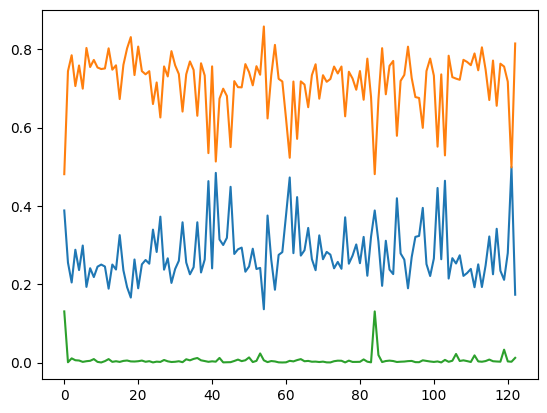

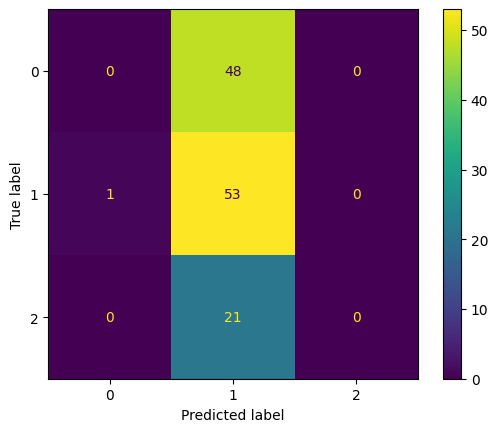

In [ ]:
predict = tf.squeeze(predicted)
plt.plot(predict)
print(predict)
predic= np.array([np.argmax(row) for row in predicted])
actual = np.array([np.argmax(row) for row in tensor])
conf_mat = confusion_matrix(actual, predic)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [ ]:

"Anteroposterior 1",'Anteroposterior 2','Vertical 1','Vertical 2','Transverse','Spacing','Pan 1','Total Row Score A','Goslon Score A'

          
'Anteroposterior 1.1','Anteroposterior 2.1','Vertical 1.1', 'Vertical 2.1', 'Transverse.1', 'Spacing.1', 'Pan 1.1', 'Total Row Score B', 'Goslon Score B'

xnew = np.array([[9, 0, 3, 0, 6, 1, 4 ,4, 26],
                 [12, 0, 2, 3, 8, 1, 4, 3, 32]])

scaler.fit(xnew)
xnew = scaler.transform(xnew)

#total_row_score(xnew)
xnew

array([[0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 1.]])

In [ ]:
new_prediction = model.predict(xnew.reshape(1,18))
new_prediction = tf.squeeze(new_prediction)

print(new_prediction)

1/1 [==============================] - 0s 87ms/step
tf.Tensor([0.205172   0.7236785  0.07114942], shape=(3,), dtype=float32)


In [ ]:

print(predic_func(new_prediction))

The estimate would be class 2 with a probability of 72.36785125732422


In [ ]:
from sklearn import svm 

clf = svm.SVC()
clf.fit(X_train, y_train.Output)
clf.predict(X_test)
clf.score(X_test, y_test.Output)


0.7419354838709677

In [ ]:
xnewnew = [9, 0, 3, 0, 6,1, 4 ,4, 26,12, 0, 2, 3, 8,1, 4, 3, 32]
xnewnew

[9, 0, 3, 0, 6, 1, 4, 4, 26, 12, 0, 2, 3, 8, 1, 4, 3, 32]

In [ ]:
clf.predict([xnewnew])

array([0])

In [2047]:

tf.keras.models.load_model('bin_model_syn_train.h5')